# Naive Bayes Classification

- Naive Bayes classifiers are built on Bayesian classification Methods. It is a relationship of conditional probability of statistical quantities.
- Baysian classification actually find the probability of label given some observed features, which can be wrote as a  $P(L | features)$

$$P(class | features) = \frac{P(features | class) * P(class)} {P(features)}$$

For binary classification that means there are two class such a Malignat or Benign. Then lets called them $class_1$  and $class_2$ , then compute the ratio of the posterior probability of two labels

$$\frac{P(class_1 | features)} {P(class_2 | features)} = \frac{P(features | class_1) P(class_1)} {P(features | class_2) P(class_2)}$$

# Gaussian Naive Bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

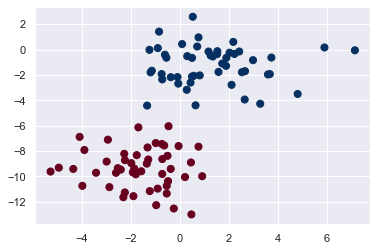

In [41]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
plt.show()

In [42]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [43]:
# new data to predict the labels
random_num_gen = np.random.RandomState(0)
X_test = [-6, -14] + [14, 18] * random_num_gen.rand(2000, 2)
y_test = model.predict(X_test)

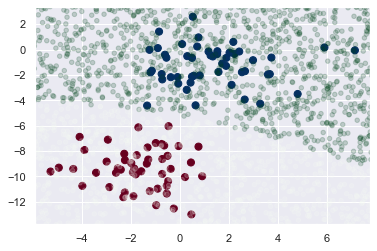

In [44]:
plt.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap='Greens', s= 20,alpha=0.2 )
plt.axis(lim)
plt.show()

In [45]:
y_prob = model.predict_proba(X_test)
y_prob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The above columns give the posterior probabilities of the first and second label respectively.If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

## Multinomial Naive Bayes
### In The multinomial Naive Bayes , where the features are assumed to be generated from a simple multinomial distribution.The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

## Classification of text

### One place where multinomial nave bayes is often used is in the text classification, where features are related to word count or frequnecies within the document to be classified.

In [46]:
from sklearn.datasets import fetch_20newsgroups

In [47]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [48]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

In [49]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [51]:
print(train.data[10])

From: mussack@austin.ibm.com (Christopher Mussack)
Subject: Re: Questioning Authority
Lines: 60

Despite my trendy, liberal, feminist tendencies and the fact
that I basically agree with what you are saying I will rebut:

(Dr Nancy's Sweetie) writes:
> (Chris Mussack) writes:
> > For all those people who insist I question authority: Why?
> ...
> Authorities sometimes tell people to do evil things.  People who "just
> follow orders" have tortured and killed others in very large numbers,
> and protest their innocence afterwards.
 
The basic question here is "how do I know what I am supposed to do?"
This is true in every situation that comes up. Some people do not
think about it at all and merely follow their impulses. I claim
that is just as dangerous as "following authority". I could site
sexually transmitted diseases, drug abuse, all manner of criminal
activity, the savings and loan scandal, car accidents, eggs thrown
at my house, all are examples of people not "following authority".
I 

### COnvert the text data into vector to use in machine learning purpose.
### Use TF-IDF vectorizer and create a pipelie for multinomial naive bayes classifier.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [53]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [54]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(89.133125, 0.5, 'predicted label')

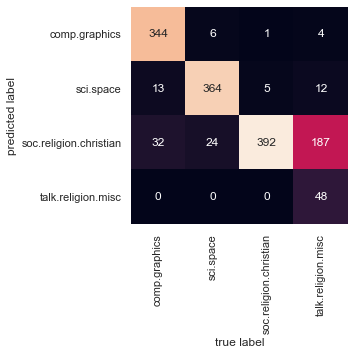

In [55]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(
    mat.T,
    square=True, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    xticklabels=train.target_names,
    yticklabels=train.target_names, 
    )
plt.xlabel('true label')
plt.ylabel('predicted label')